In [1]:
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/proc_MA_1k_albums_not_cumulative.csv')
df.dropna(axis=0)#.head()


,artist,album,ignored tags,image,listeners,mbid,playcount,release-date,tags,url,MA_score,MA_artist,MA_album
0,Opeth,Pale Communion,"['Progressive rock', 'neo-erotic spandex rock'...",[{'#text': 'https://lastfm.freetls.fastly.net/...,99876.0,9cb4a5bb-bc24-4b4d-b1f5-e5a07397d980,2636647.0,2014-06-17,[],https://www.last.fm/music/Opeth/Pale+Communion,9.63,Opeth,Pale Communion
1,Cynic,Traced in Air,"['Progressive metal', 'progressive death metal...",[{'#text': 'https://lastfm.freetls.fastly.net/...,99804.0,89d8943c-507f-4476-8b61-dbfef0dce878,3440206.0,2008-10-22,[],https://www.last.fm/music/Cynic/Traced+in+Air,13.05,Cynic,Traced in Air
2,Nevermore,This Godless Endeavor,"['Progressive metal', 'albums I own', 'Power m...",[{'#text': 'https://lastfm.freetls.fastly.net/...,99271.0,b0f0b904-5b74-39d2-92a6-8005d253f5ca,2635940.0,2005-07-25,"['thrash metal', 'heavy metal']",https://www.last.fm/music/Nevermore/This+Godle...,16.20,Nevermore,This Godless Endeavor
3,Arch Enemy,Burning Bridges,"['Melodic Death Metal', 'albums I own', 'swedi...",[{'#text': 'https://lastfm.freetls.fastly.net/...,97764.0,ba3ecec8-a8d3-3ff0-beb4-eb48a0e3ec9b,1610245.0,1999-05-21,"['death metal', 'thrash metal']",https://www.last.fm/music/Arch+Enemy/Burning+B...,11.95,Arch Enemy,Burning Bridges
4,Agalloch,Pale Folklore,"['1999', 'albums I own']",[{'#text': 'https://lastfm.freetls.fastly.net/...,97664.0,cc5ec0dd-6892-4e1a-a4e5-ef035b21aa38,2894251.0,1999-07-06,"['folk metal', 'doom metal', 'black metal']",https://www.last.fm/music/Agalloch/Pale+Folklore,14.96,Agalloch,Pale Folklore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,Iced Earth,Night of the Stormrider,"['Power metal', 'albums I own', 'metal']",[{'#text': 'https://lastfm.freetls.fastly.net/...,101988.0,c31686ee-fa0c-3768-9339-09e913147253,1145463.0,1991-11-01,"['heavy metal', 'thrash metal']",https://www.last.fm/music/Iced+Earth/Night+of+...,15.97,Iced Earth,Night of the Stormrider
902,Behemoth,Satanica,"['Blackened Death Metal', 'albums I own', 'pol...",[{'#text': 'https://lastfm.freetls.fastly.net/...,100972.0,33ce483e-18cf-4a35-8fb0-d456fb83a655,1848288.0,1999-10,"['death metal', 'black metal']",https://www.last.fm/music/Behemoth/Satanica,10.28,Behemoth,Satanica
903,Cannibal Corpse,The Bleeding,"['Brutal Death Metal', 'albums I own', '1994',...",[{'#text': 'https://lastfm.freetls.fastly.net/...,100964.0,81742ddb-2a85-4d19-867c-79cc3f37c461,1694617.0,1994-03,['death metal'],https://www.last.fm/music/Cannibal+Corpse/The+...,13.71,Cannibal Corpse,The Bleeding
904,Meshuggah,Chaosphere,"['Progressive metal', 'math metal', '1998', 'a...",[{'#text': 'https://lastfm.freetls.fastly.net/...,100623.0,772ad8a8-f3fe-3a06-8d82-d6d529b5a785,1943981.0,1998-11-09,['death metal'],https://www.last.fm/music/Meshuggah/Chaosphere,16.21,Meshuggah,Chaosphere


In [3]:
ignored_tags = []

In [4]:
df['ignored tags'].dropna(axis=0)

0      ['Progressive rock', 'neo-erotic spandex rock'...
1      ['Progressive metal', 'progressive death metal...
2      ['Progressive metal', 'albums I own', 'Power m...
3      ['Melodic Death Metal', 'albums I own', 'swedi...
4                               ['1999', 'albums I own']
                             ...                        
901             ['Power metal', 'albums I own', 'metal']
902    ['Blackened Death Metal', 'albums I own', 'pol...
903    ['Brutal Death Metal', 'albums I own', '1994',...
904    ['Progressive metal', 'math metal', '1998', 'a...
905    ['albums I own', 'Norwegian Black Metal', '199...
Name: ignored tags, Length: 906, dtype: object

In [5]:
tags_df = df[['tags','ignored tags']].dropna(axis=0)

In [6]:
ign_tags = tags_df['ignored tags'].values
tags = tags_df['tags'].values

In [7]:
ign_tags_list = []

for ign_tag in ign_tags:
    ign_tags_list.append(eval(ign_tag))

tags_list = []

for tag in tags:
    tags_list.append(eval(tag))

In [8]:
import itertools
ign_tags_merged = list(set(list(itertools.chain.from_iterable(ign_tags_list))))
tags_merged = list(set(list(itertools.chain.from_iterable(tags_list))))

In [9]:
set(ign_tags_merged)

{'10s',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2000s',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2010s',
 '2011',
 '2012',
 '2013',
 '2014',
 '2014: albums',
 '2015',
 '70s',
 '718 Metal',
 '80s',
 '90s',
 'Atmospheric metal',
 'Avant-Garde',
 'Avant-Garde Black Metal',
 'Avant-garde Metal',
 'Avantgarde Metal',
 'Awesome',
 'BONK BONK BONK',
 'Bay Area',
 'Black Doom Metal',
 'Black Sabbath',
 'Black n Roll',
 'Blackened Death Metal',
 'Bree Breee',
 'Brutal Death Metal',
 'Brutal Technical Death Metal',
 'Celtic Folk Metal',
 'Chad Kroeger',
 'Crust',
 'DJENT',
 'DSBM',
 'Dark metal',
 'Death Doom Metal',
 'Dont burn the witch',
 'Doom',
 'Dream Theater',
 'Epic Doom Metal',
 'Extreme G

In [10]:
set(tags_merged)

{'NWOBHM',
 'NWOTHM',
 'alternative metal',
 'ambient black metal',
 'black metal',
 'blackened heavy metal',
 'blackgaze',
 'celtic metal',
 'crossover thrash',
 'crust punk',
 'death metal',
 'deathcore',
 'deathgrind',
 'doom metal',
 'drone metal',
 'folk metal',
 'funeral doom',
 'goregrind',
 'grindcore',
 'hair metal',
 'heavy metal',
 'mathcore',
 'melodic metal',
 'metalcore',
 'pagan metal',
 'pirate metal',
 'sludge metal',
 'speed metal',
 'stoner metal',
 'symphonic death metal',
 'symphonic metal',
 'teutonic thrash metal',
 'thrash metal',
 'viking metal',
 'war metal'}

In [11]:
G = nx.Graph()
G.add_nodes_from(tags_merged) #create a node for each tag
nx.set_node_attributes(G, 1,'weight')


In [12]:
for d in tags_list:
    # Increase node weight
    for n in d:
        G.nodes[n]['weight'] += 1

    # Draw Edges (or increase weight if already present)
    if len(d) >= 2:
        for comb in itertools.combinations(d, 2):
            u = comb[0]
            v = comb[1]
            if G.has_edge(u, v):
                G[u][v]['weight'] += 1
            else:
                G.add_edge(u, v, weight=1)


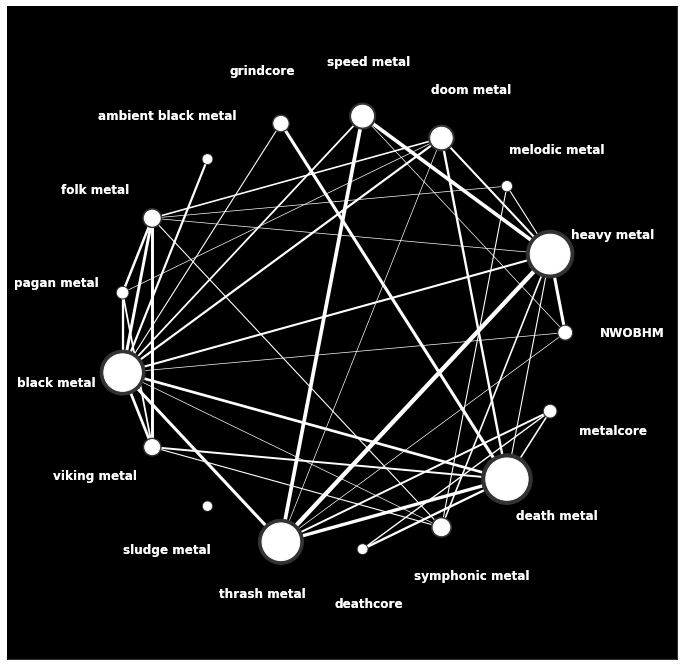

In [20]:
import math
n_weights = nx.get_node_attributes(G, 'weight')
n_weights = { key:value for (key,value) in n_weights.items() if value >= 10} # filter by min 10 entries
G_sub = G.subgraph(n_weights.keys())
edges,e_weights = zip(*nx.get_edge_attributes(G_sub,'weight').items())

plt.rcParams['axes.facecolor'] = 'black'
# COLOR = 'white'
# matplotlib.rcParams['text.color'] = COLOR

plt.figure(1,figsize=(12,12)) 
pos = nx.circular_layout(G_sub)
pos_outer = {}
offset = 1.05  # offset on the y axis

for k, v in pos.items():
    pos_outer[k] = (v[0]*(offset+0.25), v[1]*(offset+0.2))

nx.draw_networkx(G_sub, pos, nodelist=n_weights.keys(), node_size=[v * 10 for v in n_weights.values()], node_color='#333333', edge_color='white', width=[math.log(v) * 1.0 for v in e_weights], with_labels=False)
nx.draw_networkx_nodes(G_sub, pos, nodelist=n_weights.keys(), node_size=[v * 7 for v in n_weights.values()], node_color='white')
nx.draw_networkx_labels(G_sub, pos_outer, font_color='darkgrey', font_weight='bold')
nx.draw_networkx_labels(G_sub, pos_outer, font_color='white', font_weight='bold')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

# nx.draw(G, pos, nodelist=n_weights.keys())
plt.show()

In [14]:
pos

{'NWOBHM': array([1.00000000e+00, 5.25923327e-09]),
 'heavy metal': array([0.93247223, 0.36124167]),
 'melodic metal': array([0.73900891, 0.67369562]),
 'doom metal': array([0.44573836, 0.89516329]),
 'speed metal': array([0.09226839, 0.99573414]),
 'grindcore': array([-0.2736629 ,  0.96182566]),
 'ambient black metal': array([-0.60263464,  0.79801719]),
 'folk metal': array([-0.85021707,  0.52643215]),
 'pagan metal': array([-0.98297306,  0.18374953]),
 'black metal': array([-0.98297306, -0.18374946]),
 'viking metal': array([-0.85021713, -0.52643208]),
 'sludge metal': array([-0.6026347 , -0.79801712]),
 'thrash metal': array([-0.27366287, -0.96182565]),
 'deathcore': array([ 0.09226821, -0.99573419]),
 'symphonic metal': array([ 0.44573839, -0.89516328]),
 'death metal': array([ 0.73900873, -0.67369579]),
 'metalcore': array([ 0.93247223, -0.36124169])}

In [15]:
import numpy as np
pos1 = pos['doom metal']
pos1*1.1

array([0.49031219, 0.98467962])

In [16]:
np.arctan(pos1)

array([0.41930429, 0.73013645])

In [17]:
vector_1 = [0, 1]

vector_2 = [1, 0]


unit_vector_1 = vector_1 / np.linalg.norm(vector_1)

unit_vector_2 = vector_2 / np.linalg.norm(vector_2)

dot_product = np.dot(unit_vector_1, unit_vector_2)

angle = np.arccos(dot_product)


print(angle)

1.5707963267948966
